<a href="https://colab.research.google.com/github/Nikita-Vasinkov/StatPrak-HW/blob/master/dz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/W4pyPfTX/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/F4zDq8m0/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/TBmLXg2h/tangent-line-1-7.png" width="600"/>

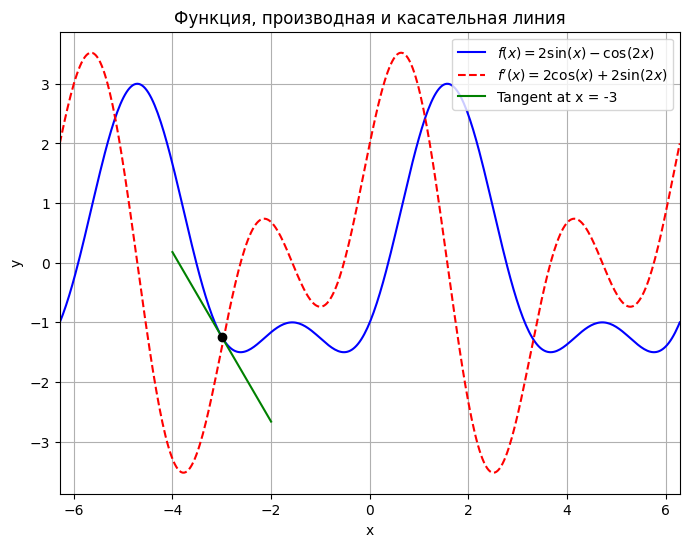

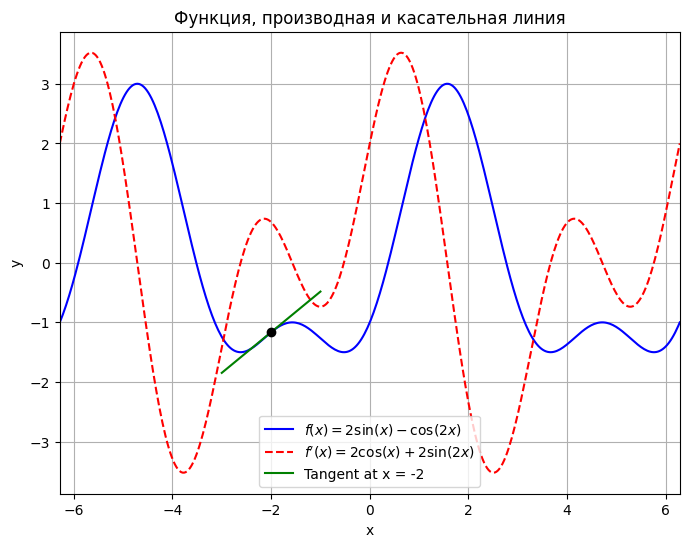

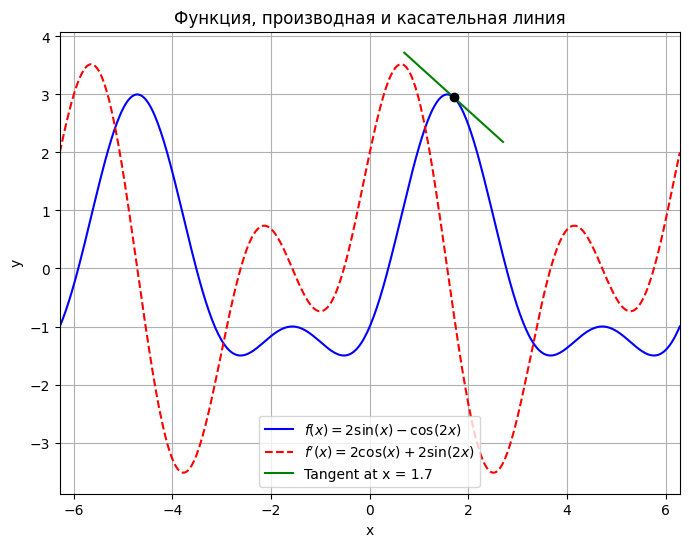

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def beauty_derivative_plot(x):
    x_sym = sp.Symbol('x')
    f_sym = 2 * sp.sin(x_sym) - sp.cos(2 * x_sym)
    df_sym = sp.diff(f_sym, x_sym)
    df = sp.lambdify(x_sym, df_sym, 'numpy')
    f = sp.lambdify(x_sym, f_sym, 'numpy')

    x_vals = np.linspace(-2 * np.pi, 2 * np.pi, 400)
    y_vals = f(x_vals)
    dy_vals = df(x_vals)

    tangent_line = f(x) + df(x) * (x_vals - x)

    delta_x = 2
    x_tangent_vals = np.linspace(x - delta_x / 2, x + delta_x / 2, 100)
    tangent_line_limited = f(x) + df(x) * (x_tangent_vals - x)

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_vals, label=r'$f(x) = 2 \sin(x) - \cos(2x)$', color='blue')
    plt.plot(x_vals, dy_vals, label=r"$f'(x) = 2\cos(x) + 2\sin(2x)$", color='red', linestyle='dashed')
    plt.plot(x_tangent_vals, tangent_line_limited, label=f'Tangent at x = {x}', color='green')
    plt.scatter([x], [f(x)], color='black', zorder=3)

    plt.xlim(-2 * np.pi, 2 * np.pi)  # Ограничиваем область по оси x
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Функция, производная и касательная линия')
    plt.grid()
    plt.show()
    return

beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)


## Problem 2

The data in [populations.txt](https://drive.google.com/file/d/1Bq7qVzbZIOd058VobGE6iYjUcMFkbZMt/view?usp=drive_link) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises **without for-loops**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

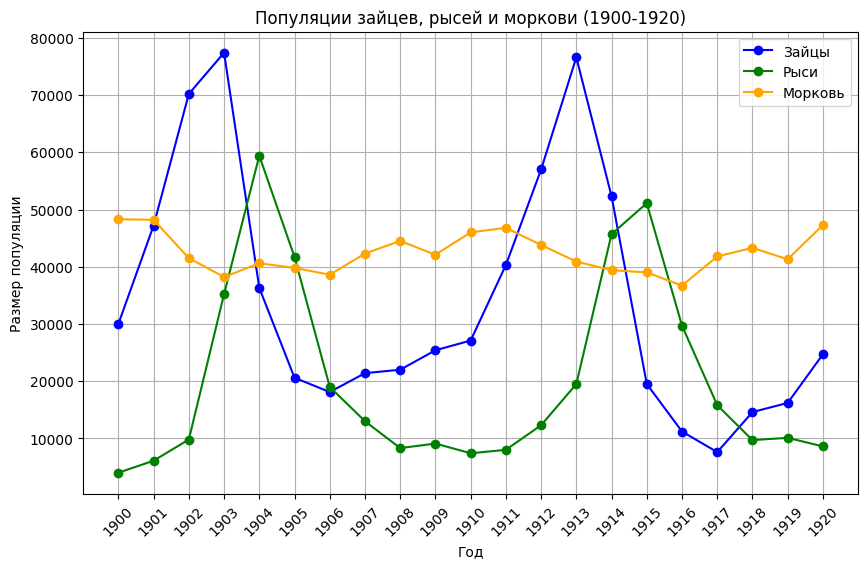

In [33]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.figure(figsize=(10, 6))
plt.plot(years, hares, label="Зайцы", color='blue', marker='o')
plt.plot(years, lynxes, label="Рыси", color='green', marker='o')
plt.plot(years, carrots, label="Морковь", color='orange', marker='o')

plt.xlabel("Год")
plt.ylabel("Размер популяции")
plt.title("Популяции зайцев, рысей и моркови (1900-1920)")

plt.xticks(years, rotation=45)
plt.legend()
plt.grid(True)

plt.show()



# Новый раздел

- Find which year each species had the largest population. Mark these years in the plot of populations.

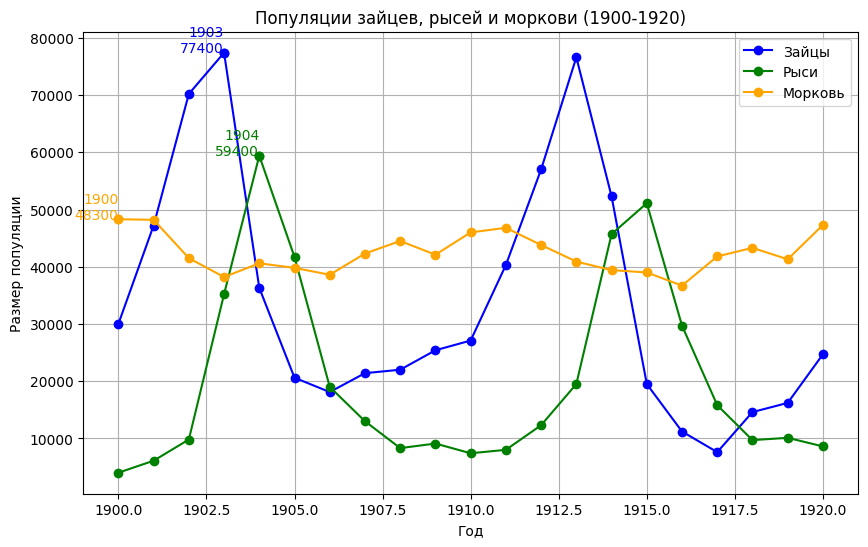

In [32]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

hare_max_year = years[np.argmax(hares)]
lynx_max_year = years[np.argmax(lynxes)]
carrot_max_year = years[np.argmax(carrots)]

plt.figure(figsize=(10, 6))
plt.plot(years, hares, label="Зайцы", color='blue', marker='o')
plt.plot(years, lynxes, label="Рыси", color='green', marker='o')
plt.plot(years, carrots, label="Морковь", color='orange', marker='o')

plt.scatter(hare_max_year, hares[np.argmax(hares)], color='blue', zorder=5)
plt.scatter(lynx_max_year, lynxes[np.argmax(lynxes)], color='green', zorder=5)
plt.scatter(carrot_max_year, carrots[np.argmax(carrots)], color='orange', zorder=5)

plt.text(hare_max_year, hares[np.argmax(hares)], f'{hare_max_year}\n{int(hares[np.argmax(hares)])}', color='blue', ha='right')
plt.text(lynx_max_year, lynxes[np.argmax(lynxes)], f'{lynx_max_year}\n{int(lynxes[np.argmax(lynxes)])}', color='green', ha='right')
plt.text(carrot_max_year, carrots[np.argmax(carrots)], f'{carrot_max_year}\n{int(carrots[np.argmax(carrots)])}', color='orange', ha='right')

plt.xlabel("Год")
plt.ylabel("Размер популяции")
plt.title("Популяции зайцев, рысей и моркови (1900-1920)")

plt.legend()
plt.grid(True)
plt.show()


- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

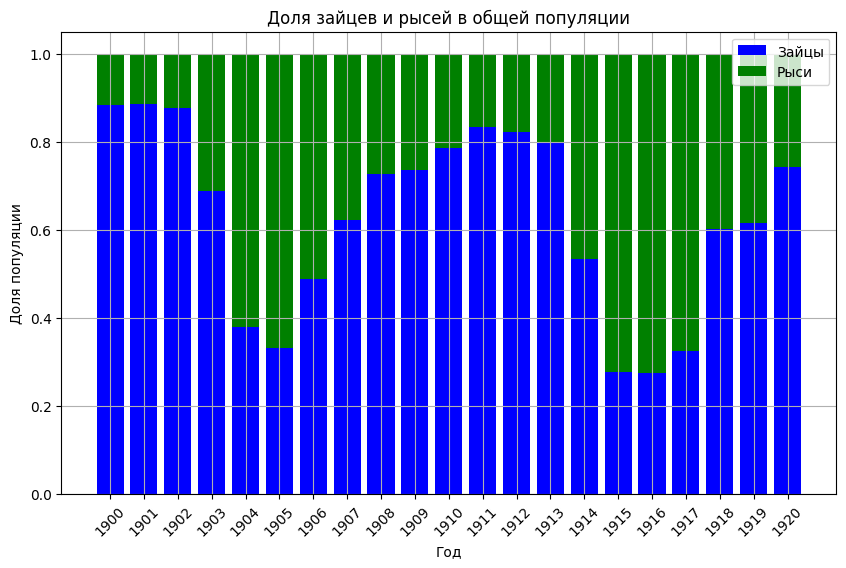

In [25]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]

total_population = hares + lynxes
hare_ratio = hares / total_population
lynx_ratio = lynxes / total_population

plt.figure(figsize=(10, 6))
plt.bar(years, hare_ratio, label="Зайцы", color='blue')
plt.bar(years, lynx_ratio, bottom=hare_ratio, label="Рыси", color='green')

plt.xlabel("Год")
plt.ylabel("Доля популяции")
plt.title("Доля зайцев и рысей в общей популяции")

plt.xticks(years, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

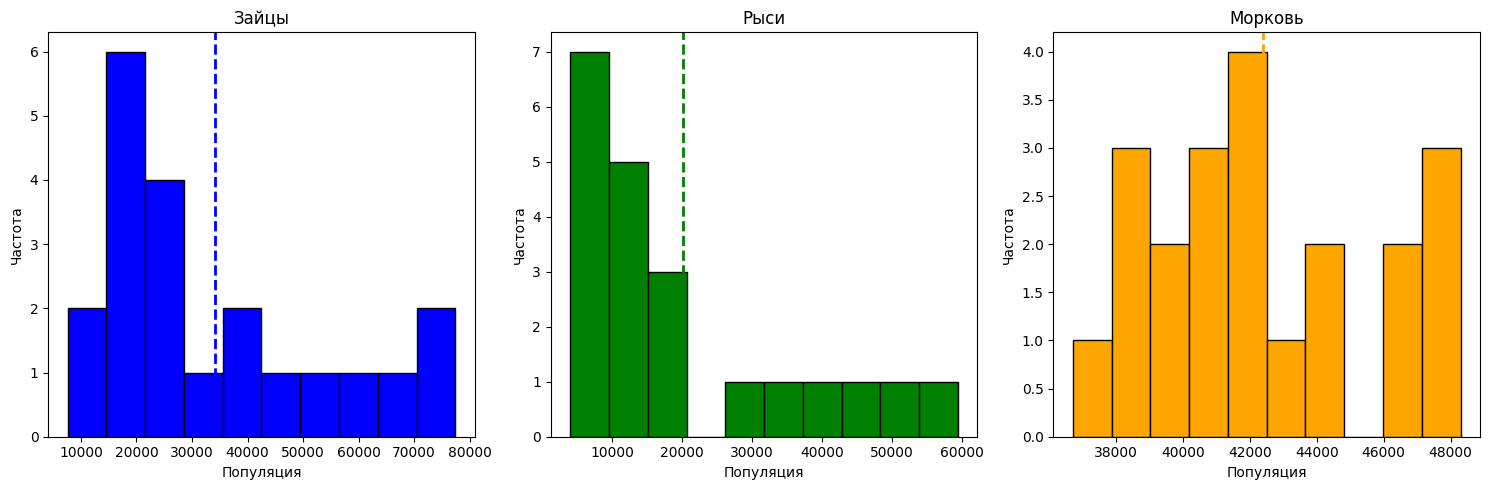

In [31]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

hare_mean = np.mean(hares)
hare_std = np.std(hares)

lynx_mean = np.mean(lynxes)
lynx_std = np.std(lynxes)

carrot_mean = np.mean(carrots)
carrot_std = np.std(carrots)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(hares, bins=10, color='blue', edgecolor='black')
plt.axvline(hare_mean, color='blue', linestyle='dashed', linewidth=2)
plt.title("Зайцы")
plt.xlabel("Популяция")
plt.ylabel("Частота")

plt.subplot(1, 3, 2)
plt.hist(lynxes, bins=10, color='green', edgecolor='black')
plt.axvline(lynx_mean, color='green', linestyle='dashed', linewidth=2)
plt.title("Рыси")
plt.xlabel("Популяция")
plt.ylabel("Частота")

plt.subplot(1, 3, 3)
plt.hist(carrots, bins=10, color='orange', edgecolor='black')
plt.axvline(carrot_mean, color='orange', linestyle='dashed', linewidth=2)
plt.title("Морковь")
plt.xlabel("Популяция")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()


- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


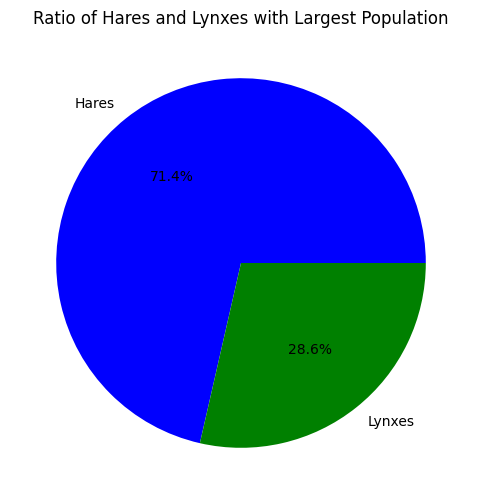

In [30]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

hares = data[:, 1]
lynxes = data[:, 2]

population_comparison = np.where(hares > lynxes, 'H', 'L')

print(population_comparison)

hare_count = np.sum(population_comparison == 'H')
lynx_count = np.sum(population_comparison == 'L')

plt.figure(figsize=(6, 6))
plt.pie([hare_count, lynx_count], labels=['Hares', 'Lynxes'], autopct='%1.1f%%', colors=['blue', 'green'])
plt.title("Ratio of Hares and Lynxes with Largest Population")
plt.show()


- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


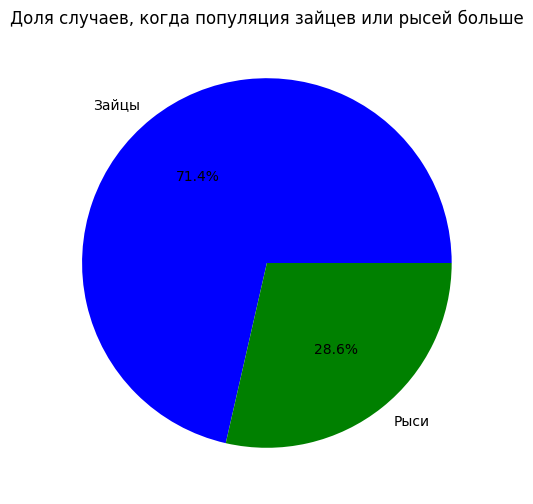

In [29]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

hares = data[:, 1]
lynxes = data[:, 2]

population_comparison = np.where(hares > lynxes, 'H', 'L')

print(population_comparison)

hare_count = np.sum(population_comparison == 'H')
lynx_count = np.sum(population_comparison == 'L')

plt.figure(figsize=(6, 6))
plt.pie([hare_count, lynx_count], labels=['Зайцы', 'Рыси'], autopct='%1.1f%%', colors=['blue', 'green'])
plt.title("Доля случаев, когда популяция зайцев или рысей больше")
plt.show()


- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

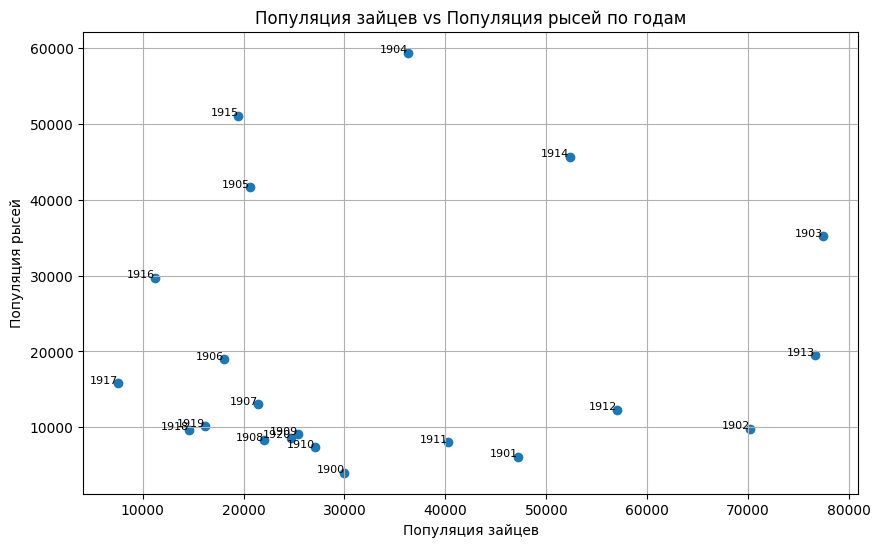

In [36]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt')

years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]

plt.figure(figsize=(10, 6))
plt.scatter(hares, lynxes)

for i, year in enumerate(years):
    plt.text(hares[i], lynxes[i], str(year), fontsize=8, ha='right')

plt.xlabel("Популяция зайцев")
plt.ylabel("Популяция рысей")
plt.title("Популяция зайцев vs Популяция рысей по годам")

plt.grid(True)
plt.show()


- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [44]:
import numpy as np

data = np.loadtxt('populations.txt')

years = data[:, 0].astype(int)
hares = data[:, 1]

true_value_1920 = hares[years == 1920][0]

x_points = np.array([1919, 1920])
y_points = np.array([hares[years == 1919][0], hares[years == 1920][0]])

def lagrange_interpolation(x, x_points, y_points):
    result = 0
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if j != i:
                term = term * (x - x_points[j]) / (x_points[i] - x_points[j])
        result += term
    return result

hare_1920_estimated = lagrange_interpolation(1920, x_points, y_points)

error = abs(hare_1920_estimated - true_value_1920)
error_ratio = error / true_value_1920

print(f"Оцененная популяция зайцев в 1920 году методом Лагранжа: {hare_1920_estimated}")
print(f"Истинная популяция зайцев в 1920 году: {true_value_1920}")
print(f"Ошибка: {error}")
print(f"Относительная ошибка: {error_ratio * 100:.2f}%")

Оцененная популяция зайцев в 1920 году методом Лагранжа: 24700.0
Истинная популяция зайцев в 1920 году: 24700.0
Ошибка: 0.0
Относительная ошибка: 0.00%
